# 时间数据

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "time": ["2022/03/12", "2022/03/13", "2022/03/14"],
    "value": [1,2,3]
})
print(df)
print("\n\ntime:\n",df["time"])


         time  value
0  2022/03/12      1
1  2022/03/13      2
2  2022/03/14      3


time:
 0    2022/03/12
1    2022/03/13
2    2022/03/14
Name: time, dtype: object


In [4]:
pd.to_datetime(df["time"])

# 它就能把这串 object 数据转换成 datetime[64] 了。这就是 Pandas 当中的 Timestamp 数据类型。

0   2022-03-12
1   2022-03-13
2   2022-03-14
Name: time, dtype: datetime64[ns]

In [5]:
pd.to_datetime(
    [
        "1@21@2022%%11|11|32", 
        "12@01@2022%%44|02|2", 
        "4@01@2022%%14|22|2"
    ],
    format="%m@%d@%Y%%%%%S|%H|%M"
)

DatetimeIndex(['2022-01-21 11:32:11', '2022-12-01 02:02:44',
               '2022-04-01 22:02:14'],
              dtype='datetime64[ns]', freq=None)

In [6]:
import datetime

start = datetime.datetime(2022, 3, 12)
end = datetime.datetime(2022, 3, 18)

index = pd.date_range(start, end)
print(
    "range(1, 10, 2)\n", 
    list(range(1, 10, 2))
)
print(
    "\n\npd.date_range()\n",
    pd.date_range(start, end, freq="48h")  # 48 hours步长
)

range(1, 10, 2)
 [1, 3, 5, 7, 9]


pd.date_range()
 DatetimeIndex(['2022-03-12', '2022-03-14', '2022-03-16', '2022-03-18'], dtype='datetime64[ns]', freq='48H')


In [7]:
print(
    "np.linspace(-1, 1, 5)\n",
    np.linspace(-1, 1, 5)
)
print(
    "\n\npd.date_range(start, end, periods=5)\n",
    pd.date_range(start, end, periods=5)    #periods 是指生成的日期个数
)

np.linspace(-1, 1, 5)
 [-1.  -0.5  0.   0.5  1. ]


pd.date_range(start, end, periods=5)
 DatetimeIndex(['2022-03-12 00:00:00', '2022-03-13 12:00:00',
               '2022-03-15 00:00:00', '2022-03-16 12:00:00',
               '2022-03-18 00:00:00'],
              dtype='datetime64[ns]', freq=None)


### 选取时间

In [8]:
start = datetime.datetime(2022, 3, 1)
end = datetime.datetime(2022, 5, 3)

rng = pd.date_range(start, end)
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts.index


DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
               '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',
               '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
      

<Axes: >

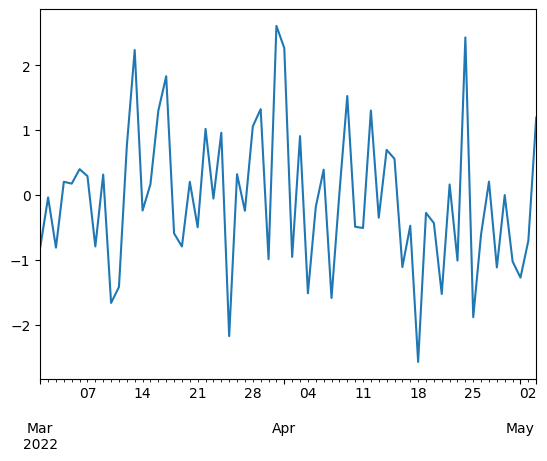

In [9]:
ts.plot()

<Axes: >

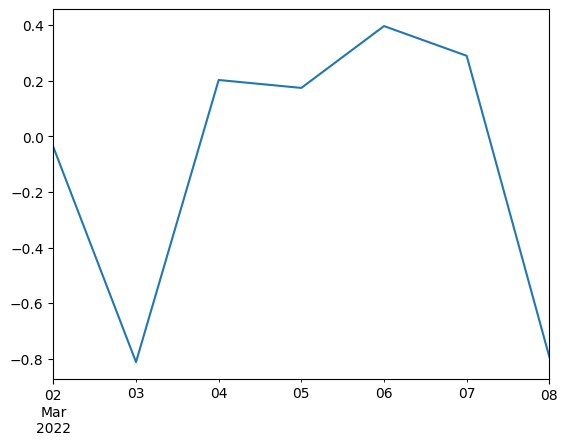

In [10]:
ts[1:8].plot()

<Axes: >

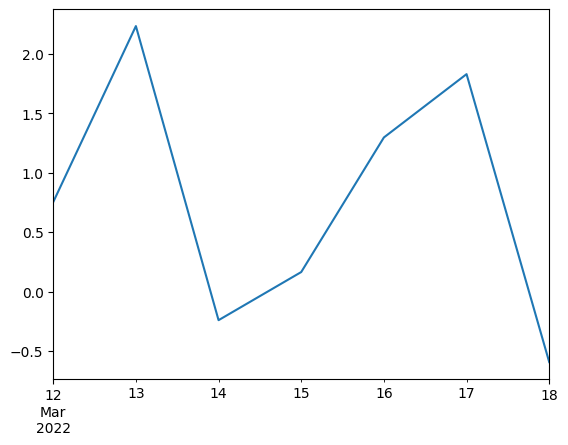

In [11]:
ts["2022-03-12": "2022-03-18"].plot()

### 时间运算

In [12]:
rng = pd.date_range("2022-01-01", "2022-01-07")
rng + pd.Timedelta(weeks=1)

# Timedelta 除了上面的 weeks, days 参数，还可以用 hours, minutes, seconds, milliseconds, microseconds, nanoseconds 这些。 这样你就能方便的运算时间了。

DatetimeIndex(['2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14'],
              dtype='datetime64[ns]', freq='D')

In [15]:
rng = pd.date_range("2022-01-08", "2022-01-11")
rng.dayofyear


Int64Index([8, 9, 10, 11], dtype='int64')

In [16]:
rng.strftime("%m/%d/%Y")  # 按规则输出日期形式

Index(['01/08/2022', '01/09/2022', '01/10/2022', '01/11/2022'], dtype='object')